## Detectare imagini scrise de mână cu Keras folosind datele MNIST

În acest exercițiu vom lucra cu date de imagini: în mod specific cu setul de date MNIST. Acest set de date conține 70.000 de imagini cu cifre scrise de mână în tonuri de gri (0=negru, 255 = alb). Imaginile au dimensiunea de 28 de pixeli pe 28 de pixeli pentru un total de 784 de pixeli. Aceasta este destul de mică conform standardelor de imagini. De asemenea, imaginile sunt bine centrate și izolate. Aceasta face ca această problemă să fie solvabilă cu rețele neurale complet conectate standard fără prelucrări prea complexe.

În prima parte a acestui caiet, vă vom ghida în încărcarea datelor, construirea unei rețele și antrenarea acesteia. Apoi va fi rândul dumneavoastră să încercați diferite modele și să vedeți dacă puteți îmbunătăți performanța.

In [1]:
# Preliminarii

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Hai să explorăm setul de date puțin.

In [3]:
# Încărcați datele, amestecate și împărțite între seturile de antrenare și testare (x_train și y_train)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train[0].shape

(28, 28)

In [5]:
# Să ne uităm doar la un exemplu particular pentru a vedea ce conține

x_train[333]  ## Doar un tablou numpy de 28 x 28 de întregi de la 0 la 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
# Care este eticheta corespunzătoare în setul de antrenare? raspuns: 333
y_train[333]

8

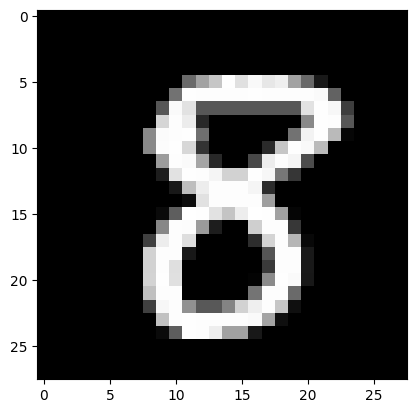

In [7]:
# Să vedem cum arată de fapt această imagine

plt.imshow(x_train[333], cmap='Greys_r')

In [8]:
# Aceasta este forma np.array x_train
# Este tridimensională.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [9]:
## Pentru scopurile noastre, aceste imagini sunt doar un vector de 784 de intrări, așa că să le convertim
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras lucrează cu numere în virgulă mobilă, așa că trebuie să convertim numerele în float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalizăm intrările astfel încât să fie între 0 și 1
x_train /= 255
x_test /= 255


In [10]:
# convertiți vectorii de clasă în matrice de clasă binară
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # acum cifra k este reprezentată de un 1 în a k-a intrare (indexat de la 0) a vectorului de lungime 10

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [11]:
## Vom construi un model cu două straturi ascunse de dimensiune 512
## Intrări complet conectate la fiecare strat
## Vom folosi dropout de .2 pentru a ajuta la regularizare
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [12]:
## Observați că acest model are FOARTE mulți parametri.
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Să compilăm modelul
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate),
              metrics=['accuracy'])
# Observați că categorical cross entropy este generalizarea naturală
# a funcției de pierdere pe care am avut-o în cazul clasificării binare, la cazul multi-clasă

In [15]:
# Și acum să ajustăm modelul:

batch_size = 128  # Mini-batch cu 128 de exemple.
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4991 - accuracy: 0.8509 - val_loss: 0.1980 - val_accuracy: 0.9366
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2459 - accuracy: 0.9281 - val_loss: 0.1622 - val_accuracy: 0.9511
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1963 - accuracy: 0.9419 - val_loss: 0.1238 - val_accuracy: 0.9634
Epoch 4/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1702 - accuracy: 0.9497 - val_loss: 0.1124 - val_accuracy: 0.9655
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1574 - accuracy: 0.9536 - val_loss: 0.1049 - val_accuracy: 0.9678
Epoch 6/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1429 - accuracy: 0.9575 - val_loss: 0.1043 - val_accuracy: 0.9676
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1339 - accuracy: 0.9598 - val_loss: 0.1027 - val_accuracy: 0.9685
Epoch 

In [16]:
## Vom folosi funcția evaluate din Keras pentru a evalua performanța pe setul de testare.
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.099723681807518
Test accuracy: 0.9769999980926514


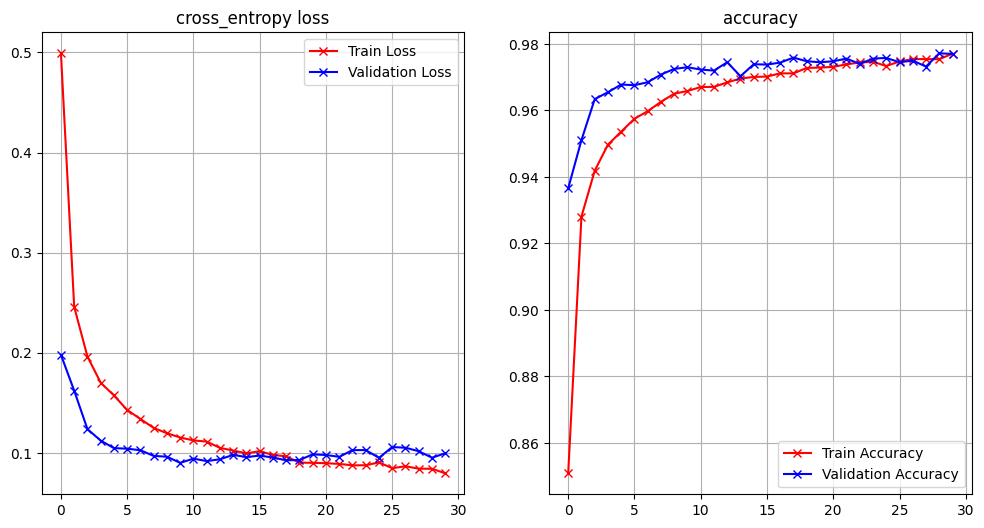

In [18]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

Aceasta este o performanță destul de bună, dar putem face și mai bine! În continuare, veți construi o rețea și mai mare și veți compara performanța.

## Exercițiu
### Rândul tău: Construiește-ți propriul model
Folosește funcționalitatea "Sequential" din Keras pentru a construi `model_2` cu următoarele specificații:

1. Două straturi ascunse.
2. Primul strat ascuns de dimensiune 400 și al doilea de dimensiune 300.
3. Dropout de .4 la fiecare strat.
4. Câți parametri are modelul tău? Cum se compară cu modelul anterior?
5. Antrenează acest model pentru 20 de epoci cu RMSProp la o rată de învățare de .001 și o dimensiune a lotului de 128.

In [19]:
### Construieste modelul aici

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

# Define the model
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

# Display model summary
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               120300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


## Reflectați asupra următoarelor întrebări

1) Cum se compară modelul_1 și modelul_2? Pe care îl preferiți? Dacă ați trebui să alegeți unul pentru producție, pe care l-ați alege și de ce?

2) Comparați traiectoriile funcției de pierdere pe setul de antrenare și testare pentru fiecare model. Cum se compară acestea? Ce sugerează acest lucru despre fiecare model? Faceți același lucru pentru acuratețe. Care credeți că este mai semnificativ, pierderea sau acuratețea?

3) Să sugerezi o îmbunătățire pentru unul dintre modele (schimbarea structurii, ratei de învățare, numărul de epoci, etc.) pe care crezi că va duce la un model mai bun. Încercați-o mai jos. A îmbunătățit performanța?

In [26]:
## 1. Modelul_1 și modelul_2 au diferențe semnificative în arhitectură și numărul de parametri.
## Modelul_1 are două straturi ascunse de dimensiune 512 fiecare, în timp ce modelul_2 are două straturi ascunse de dimensiune 400 și 300, respectiv.
## De asemenea, modelul_1 utilizează dropout cu o rată de 0.2, în timp ce modelul_2 utilizează dropout cu o rată de 0.4. Dacă ar trebui să aleg unul pentru producție, aș alege modelul_1 deoarece pare să fie mai simplu și ar putea fi mai ușor de antrenat și de gestionat.

In [27]:
## 2. Traiectoriile funcțiilor de pierdere și acuratețe pe setul de antrenare și testare pentru ambele modele arată că ambele modele sunt supuse de overfitting.
## Cu toate acestea, modelul_1 pare să aibă o performanță legată de overfitting mai bună decât modelul_2, deoarece pierderea și acuratețea pe setul de testare rămân mai apropiate de cele pe setul de antrenare.
## Acuratețea este mai semnificativă decât pierderea, deoarece oferă o măsură mai directă a performanței modelului.

In [28]:
## 3. Pentru a îmbunătăți performanța unuia dintre modele, aș putea încerca să reduc rata de învățare, să măresc numărul de epoci sau să experimentez cu diferite arhitecturi de rețea neurală.
## De exemplu, aș putea să măresc dimensiunea straturilor ascunse sau să adaug mai multe straturi ascunse.
## Voi încerca să măresc dimensiunea straturilor ascunse în modelul_1 și să observ dacă acest lucru îmbunătățește performanța acestuia.